In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# white and red wine datasets
white_wine_data = pd.read_csv('C:/Users/jasmi/Projects/Wine-Wizardry/wine-quality White.csv')
red_wine_data = pd.read_csv('C:/Users/jasmi/Projects/Wine-Wizardry/wine-quality Red.csv')

# Display first few rows 
white_wine_data.head(), red_wine_data.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  
 1      9.5        6  
 2 

In [3]:
# Add 'wine_type' to distinguish between red and white
# white_wine_data['wine_type'] = 1
# red_wine_data['wine_type'] = 0



X = red_wine_data.drop(columns=['quality'])
y = red_wine_data['quality']


In [4]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=42)

In [5]:
# the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
pca = PCA(n_components=9)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)
print(pca.explained_variance_ratio_)
print(X_train_pca.shape)
print(pca_components_df)

[0.2801769  0.17563995 0.13957636 0.11081822 0.09021248 0.05908698
 0.05266627 0.03883888 0.03129468]
(1279, 9)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.486819         -0.230695     0.467369        0.152336   0.216295   
1      -0.109289          0.293355    -0.157400        0.239182   0.149466   
2      -0.151640         -0.442608     0.220984        0.049249  -0.021770   
3      -0.211996          0.128183    -0.097646       -0.406056   0.663833   
4      -0.116956          0.204407    -0.055669        0.722412   0.286446   
5       0.151683          0.476617     0.067697        0.040310   0.234620   
6      -0.334642         -0.468471     0.140384        0.280960   0.391538   
7      -0.176844         -0.081351    -0.383500        0.324788  -0.352225   
8      -0.205265          0.129516     0.348557        0.014840  -0.128421   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.035997      

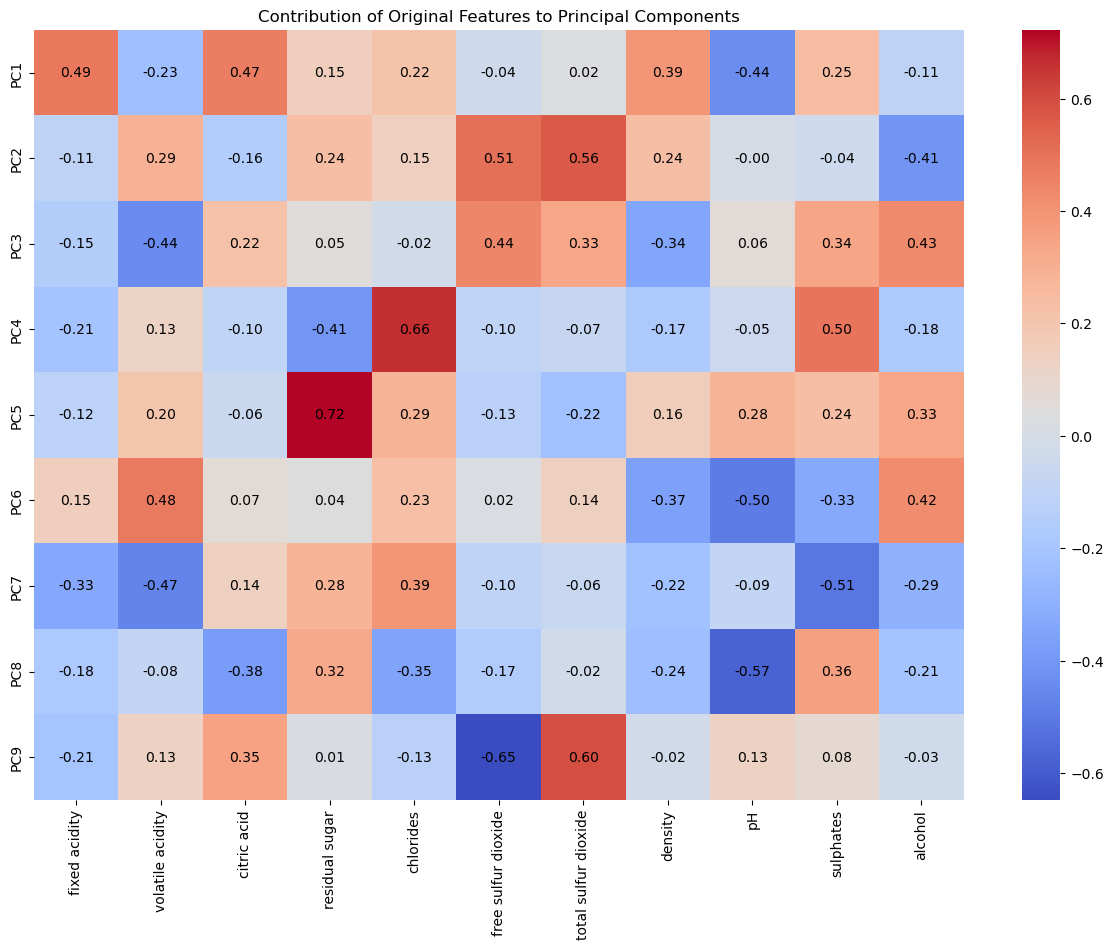

In [7]:
# Manually add annotations for each cell
plt.figure(figsize=(15, 10))
ax = sns.heatmap(pca_components_df, annot=False, fmt=".2f", cmap='coolwarm', xticklabels=X.columns, yticklabels=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))])

# Manually add annotations using plt.text
for i in range(pca_components_df.shape[0]):
    for j in range(pca_components_df.shape[1]):
        plt.text(j+0.5, i+0.5, f'{pca_components_df.values[i,j]:.2f}', ha='center', va='center', color='black')

plt.title('Contribution of Original Features to Principal Components')
plt.show()

In [8]:
# Apply SMOTE for class imbalance in combined dataset
smote = SMOTE(random_state=42, k_neighbors=2)  # Set k_neighbors to a lower value
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

In [9]:
rf_model = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample', max_depth=20, max_features='log2', min_samples_leaf=1, 
                                  min_samples_split=2, n_estimators=500, random_state=42)
# param_grid = {
#     'n_estimators': [200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 10],
#     'max_features': ['auto', 'sprt', 'log2'],
#     'bootstrap': [True, False],
#     'class_weight': ['balance', 'balanced_subsample']
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_pca, y_train)

# best_rf_model = grid_search.best_estimator_

In [ ]:
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy}")
# print(classification_report(y_test, y_pred))

In [12]:


# # train random forest
# rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_pca, y_train)

# predict
y_pred = rf_model.predict(X_test_pca)
# y_pred = rf_model.predict(X_test_pca)

In [13]:
# accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
accuracy

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.75      0.72       130
           6       0.64      0.71      0.67       132
           7       0.67      0.52      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.665625

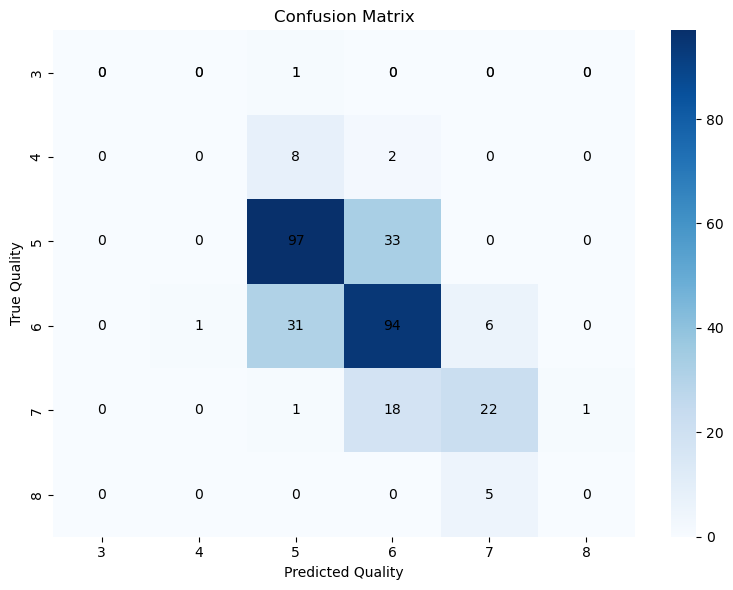

In [14]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[3, 4, 5, 6, 7, 8], yticklabels=[3, 4, 5, 6, 7, 8])
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Quality')
ax.set_ylabel('True Quality')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()